# Listado de gráficas con resultaods para el workshop

## Grafica 1: Pie

### Dependencias

In [2]:
import plotly.express as px
import numpy as np
import pandas as pd

### Datos de entrada

In [3]:

f = "data/highlight_nacional_iarc_sun.csv"
grupos = pd.read_csv(f, low_memory=False, encoding='utf-8')

### Generación de la gráfica

In [11]:
fig = px.sunburst(grupos, path=["iarc"], values='percentage', color="iarc", color_discrete_map={
    "RETC and IARC Group 1":"red", 
    "RETC and IARC Group 2A":"orange", 
    "RETC and IARC Group 2B":"gold", 
    "RETC and IARC Group 3":"yellow", 
    "Listed in IARC without Group":"purple", "Only RETC":"aliceblue"})


### Cambios en la gráfica

In [12]:
fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), font=dict(size=25))

### Almacenamiento de la gráfica

In [6]:

f_out = "figs/highlight_nacional_iarc_sun"
fig.write_html("{}.html".format(f_out))
fig.write_image(file="{}.png".format(f_out), scale=3)

## Grafica 2: Histograma de emisiones iarc1

### Depencencias

In [7]:
from matplotlib import pyplot as plt

### Datos de entrada

In [13]:
emisiones_iarc1 = pd.read_csv('data/iarc_1_sum_ton_year_t_5.csv')
substance_list = emisiones_iarc1["agent"]
eyt = emisiones_iarc1["suma_eyt"]

### Generación y almacenamiento de la grafica

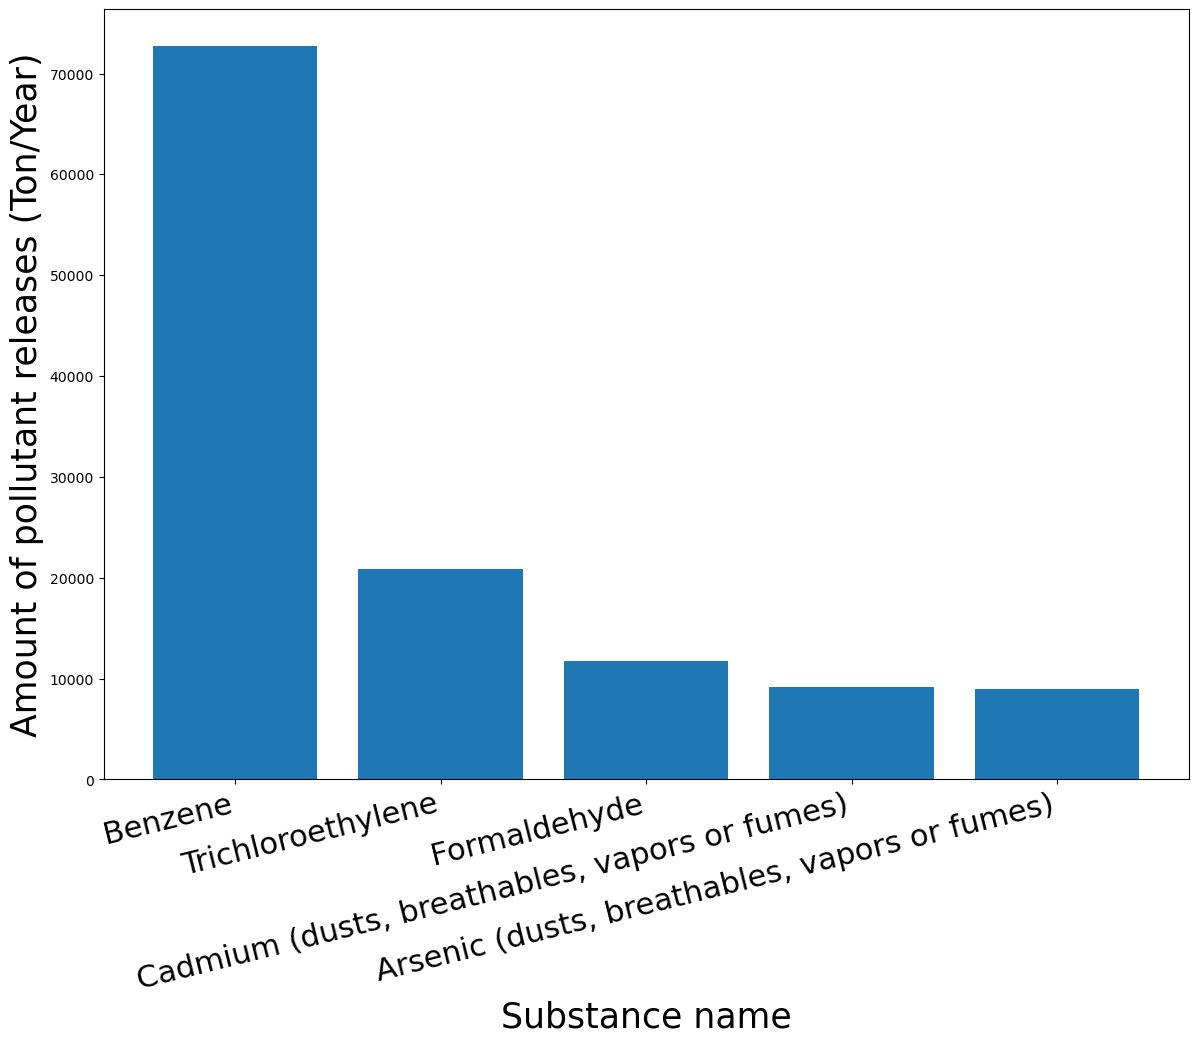

In [19]:

fig, ax = plt.subplots(figsize =(14, 10))
plt.bar(substance_list, eyt)
plt.xticks(color = 'black',rotation = 14, horizontalalignment = 'right', fontsize = '22')
plt.yticks(color = 'black')
#plt.title("Emisiones por sector reportadas en Yucatán", fontsize = '16')
plt.xlabel('Substance name', color = 'black', fontsize = '25')
plt.ylabel('Amount of pollutant releases (Ton/Year)', color = 'black', fontsize = '25')
plt.savefig('figs/iarc_1_eyt_sorted.png')


In [20]:

import json
geo = json.load(open("data/estados.json","r"))
df = pd.read_csv("data/contador_emisiones_estado.csv")

In [36]:
fig = px.choropleth_mapbox(df, geojson=geo, locations='cve_ent', 
                           featureidkey="properties.CODIGO",
                           color='emisiones',
                           hover_name='estado',
                           hover_data={"estado","cve_ent"},
                           color_continuous_scale=[[0, 'yellow'], [0.66, 'orange'], [1, 'red']],
                           mapbox_style="carto-positron",
                           zoom=3.4, 
                            center={"lat":22.3969, "lon": -101.2833},
                           opacity=0.5,
                           #labels={'emisoras':'Número de emisiones<br> o transferencia de <br>sustancias con grupo<br> 1 de la IARC'}
                           labels={'cve_ent':"Clave entidad",'emisiones':'Releases\' number'}
                          )


fig.update_layout(
    #title="Número de emisiones registradas en el Registro de Emisiones y Transferencia de Contaminates<br>desde 2004 hasta 2021 por estado",
                width=700,
                height=700,
                hovermode='closest')


fig.write_html("{}/{}.html".format("./figs","example_map"))